Philip McCormick

ECON 630-02

Novemeber 21, 2022

Assignment 4

In [49]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
# Set a random seed
np.random.seed(4)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ECON 630/data_assignment4.csv')

In [4]:
df.head()

,city,treatment_person,treatment_city,treatment_twostage,revenue_person,revenue_city,revenue_twostage
0,atlanta,0,0,1,27.454834,27.454834,30.054834
1,atlanta,0,0,1,15.374318,15.374318,17.974318
2,atlanta,0,0,1,23.229566,23.229566,25.829566
3,atlanta,0,0,1,7.713634,7.713634,10.313634
4,atlanta,0,0,1,12.333270,12.333270,14.933270


In [5]:
df.city.unique()

array(['atlanta', 'austin', 'baltimore', 'boston', 'charlotte', 'chicago',
       'columbus', 'dallas', 'denver', 'detroit', 'elpaso', 'fresno',
       'houston', 'jacksonville', 'kansascity', 'lasvegas', 'losangeles',
       'louisville', 'memphis', 'miami', 'milwaukee', 'minneapolis',
       'nashville', 'newyork', 'oklahomacity', 'omaha', 'philadelphia',
       'phoenix', 'portland', 'sanantonio', 'sandiego', 'sanfrancisco',
       'sanjose', 'seattle', 'tampa', 'washingtondc'], dtype=object)

In [6]:
# calculate the number of users in each city
df.groupby('city')['treatment_twostage'].count()

city
atlanta         1000
austin          1000
baltimore       1000
boston          1000
charlotte       1000
chicago         1000
columbus        1000
dallas          1000
denver          1000
detroit         1000
elpaso          1000
fresno          1000
houston         1000
jacksonville    1000
kansascity      1000
lasvegas        1000
losangeles      1000
louisville      1000
memphis         1000
miami           1000
milwaukee       1000
minneapolis     1000
nashville       1000
newyork         1000
oklahomacity    1000
omaha           1000
philadelphia    1000
phoenix         1000
portland        1000
sanantonio      1000
sandiego        1000
sanfrancisco    1000
sanjose         1000
seattle         1000
tampa           1000
washingtondc    1000
Name: treatment_twostage, dtype: int64

In [7]:
df.groupby('city')['treatment_twostage'].sum()

city
atlanta         200
austin          300
baltimore       100
boston          300
charlotte       200
chicago         200
columbus        400
dallas          400
denver          600
detroit         500
elpaso          300
fresno          100
houston         700
jacksonville    900
kansascity      500
lasvegas        800
losangeles      700
louisville      800
memphis         500
miami           300
milwaukee       600
minneapolis     400
nashville       700
newyork         500
oklahomacity    800
omaha           800
philadelphia    600
phoenix         700
portland        200
sanantonio      600
sandiego        400
sanfrancisco    900
sanjose         900
seattle         100
tampa           900
washingtondc    100
Name: treatment_twostage, dtype: int64

In [8]:
df.treatment_twostage.sum()

18000

In [9]:
df.city.count()

36000

In [10]:
from collections import Counter

Counter(df.city).keys()

dict_keys(['atlanta', 'austin', 'baltimore', 'boston', 'charlotte', 'chicago', 'columbus', 'dallas', 'denver', 'detroit', 'elpaso', 'fresno', 'houston', 'jacksonville', 'kansascity', 'lasvegas', 'losangeles', 'louisville', 'memphis', 'miami', 'milwaukee', 'minneapolis', 'nashville', 'newyork', 'oklahomacity', 'omaha', 'philadelphia', 'phoenix', 'portland', 'sanantonio', 'sandiego', 'sanfrancisco', 'sanjose', 'seattle', 'tampa', 'washingtondc'])


**Problem 1: Network Effects**


1. (10 points) Using the first version of the experiment – person-level randomization – esti-
mate the treatment effect and the standard errors. You should use at least 2,000 bootstrap
iterations.


In [11]:
# Define a regression function
def regression(f, df):
  result = sm.ols(formula = f, data = df).fit()
  return(result.params[1])

# Get point estimate
pointestimate = regression('revenue_person ~ treatment_person', df)
print("Estimated effect of treatment is: " + str(round(pointestimate, 3)))

# Get summary on number of treated / control units
print("There are " + str(sum(df['treatment_person'])) + " treated units and " + 
      str(len(df['treatment_person']) - sum(df['treatment_person'])) + " control units")

Estimated effect of treatment is: 3.482
There are 18000 treated units and 18000 control units


In [12]:
index_treated = np.where(df['treatment_person'] == 1)[0]
index_control = np.where(df['treatment_person'] == 0)[0]
bootstrap = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 1800 treated and 1800 control units in every iteration
for i in range(2000):
  treated_sample = np.random.choice(index_treated, len(index_treated), 
                                    replace = True)
  control_sample = np.random.choice(index_control, len(index_control), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate = regression('revenue_person ~ treatment_person', df.iloc[sample,])
  bootstrap.append(estimate)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(estimate, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap), 4)))
print("The t-statistic is: " + str(round(pointestimate/np.std(bootstrap), 4)))

Estimated effect of treatment is: 3.3
The standard error of the estimate: 0.1613
The t-statistic is: 21.588


2. (10 points) Using the second version of the experiment – city-level randomization – estimate
the treatment effect and the standard errors. Remember that the units of the analysis in this
schematic are not people but cities. Again, you should use at least 2,000 bootstrap iterations.


In [13]:
# Get point estimate
pointestimate2 = regression('revenue_city ~ treatment_city', df)
print("Estimated effect of treatment is: " + str(round(pointestimate2, 3)))

# Get summary on number of treated / control units
print("There are " + str(sum(df['treatment_city'])) + " treated units and " + 
      str(len(df['treatment_city']) - sum(df['treatment_city'])) + " control units")

Estimated effect of treatment is: 1.151
There are 18000 treated units and 18000 control units


In [21]:
index_treated = np.where(df['treatment_city'] == 1)[0]
index_control = np.where(df['treatment_city'] == 0)[0]
bootstrap2 = []

# For each bootstrap iteration, sample treated and control units separately,
# thus preserving 18 treated and 18 control units in every iteration(or 1000 people in treatment and control per city)
for i in range(2000):
  treated_sample = np.random.choice(index_treated, int(len(df['city'].unique())/2), 
                                    replace = True)
  control_sample = np.random.choice(index_control, int(len(df['city'].unique())/2), 
                                    replace = True)
  sample = np.append(treated_sample, control_sample)
  estimate2 = regression('revenue_city ~ treatment_city', df.iloc[sample,])
  bootstrap2.append(estimate2)

# Compute standard deviation of the point estimates across all iterations, 
# which is the standard error of the original point estimate
print("Estimated effect of treatment is: " + str(round(pointestimate2, 3)))
print("The standard error of the estimate: " + str(round(np.std(bootstrap2), 4)))
print("The t-statistic is: " + str(round(pointestimate2/np.std(bootstrap2), 4)))

Estimated effect of treatment is: 1.151
The standard error of the estimate: 5.0362
The t-statistic is: 0.2286


3. (10 points) Compare the two estimates on the basis of bias and variance. Under what
conditions would you trust each one more?


For the treated person variance, we compute a much smaller standard error (0.16) than the treated city (5.04). This is due to treating the person-level experiment as 36,000 observations as oppose to 36 unique cities with their own variances. Though the treated person variance is lower than treated city, there may be more bias in this version of the experiment due not accounting for regions in which the experiment is taking place. The trade-off of estimates would be to trust the treated city for having less bias but more variance, while the treated person has more bias but less variance.

4. In addition to the concerns around bias and variance discussed above, these two estimates
only target the total treatment effect; and do not allow us to identify a direct effect from any
indirect effects. We will use the two-stage randomization schematic to improve on this. We
will make the strong simplifying assumptions that the direct effect is constant, and that the
direct and indirect treatment effects are additive.

(a) (10 points) First, estimate the treatment effect within each city. Second, plot the
estimated treatment effect against the proportion of the city treated, and fit a straight
line to the data.


In [26]:
treatment_effects=[]
for feature in list(df['city'].unique()):
  df1 = df.loc[df["city"]==feature]
  result = sm.ols(formula="revenue_twostage ~ treatment_twostage", 
                data = df1).fit()
  te = result.params[0] + result.params[1]
  treatment_effects.append(te)
  print("The treatment effect " + str(feature) + ": " + str(round(te, 2)))

The treatment effect atlanta: 20.97
The treatment effect austin: 30.46
The treatment effect baltimore: 5.3
The treatment effect boston: 20.52
The treatment effect charlotte: 5.1
The treatment effect chicago: 6.5
The treatment effect columbus: 14.74
The treatment effect dallas: 24.61
The treatment effect denver: 23.37
The treatment effect detroit: 11.4
The treatment effect elpaso: 41.24
The treatment effect fresno: 23.73
The treatment effect houston: 42.07
The treatment effect jacksonville: 43.69
The treatment effect kansascity: 20.7
The treatment effect lasvegas: 43.79
The treatment effect losangeles: 9.13
The treatment effect louisville: 31.76
The treatment effect memphis: 30.97
The treatment effect miami: 16.71
The treatment effect milwaukee: 16.61
The treatment effect minneapolis: 15.73
The treatment effect nashville: 22.56
The treatment effect newyork: 20.77
The treatment effect oklahomacity: 5.15
The treatment effect omaha: 42.72
The treatment effect philadelphia: 10.16
The treatm

In [43]:
# yint = direct effect 
#xint = indirect effect
y = treatment_effects
x = df.groupby('city')['treatment_twostage'].sum()

city
atlanta         200
austin          300
baltimore       100
boston          300
charlotte       200
chicago         200
columbus        400
dallas          400
denver          600
detroit         500
elpaso          300
fresno          100
houston         700
jacksonville    900
kansascity      500
lasvegas        800
losangeles      700
louisville      800
memphis         500
miami           300
milwaukee       600
minneapolis     400
nashville       700
newyork         500
oklahomacity    800
omaha           800
philadelphia    600
phoenix         700
portland        200
sanantonio      600
sandiego        400
sanfrancisco    900
sanjose         900
seattle         100
tampa           900
washingtondc    100
Name: treatment_twostage, dtype: int64

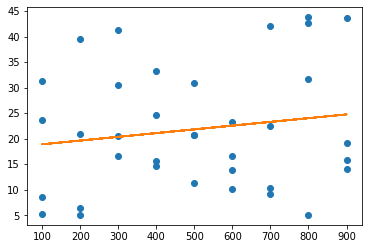

In [44]:
#find line of best fit
m, b = np.polyfit(x, y, 1)

#add points to plot
plt.plot(x, y, 'o')

#add line of best fit to plot
plt.plot(x, m*x + b) 

(b) (10 points) Use the line to extract the direct treatment effect and the indirect treatment
effect on the treated. Since the direct effect is constant, a valid interpretation is that it
is the effect of receiving treatment when nobody else in your city does. Furthermore, the
indirect effect on the treated is the added effect, for a given treated user, as you move
from nobody in your city to everyone in your city receiving treatment.

In [45]:
# yint = direct effect 

b

18.191537881429557

In [46]:
#slope = indirect effect

m

0.007309658266059515

(c) (10 points) Bootstrapping for two-stage randomization is fairly complex. Rather than
implement it technically, describe verbally how you would do it.

In order to run the bootstrap for the two-stage randomization experiment, we would need to randomize at the city level, set each city to a random fraction of treatment that would total a 50-50 split of treatment and control (18000 each), from there we would get the estimated treatment effect for each of the cities, and iterate through that process 2000 times. We would also look for the standard error and a t-stat to understand significance. This would closely replicate the true effect on the population that the bootstrap aims to capture. 

(d) (10 points) Note that standard errors generated when you implement the bootstrap
are respectively 0.32 and 0.58. Using this information, verbally compare this estimator
to the first two on bias and variance.

With these standard errors in mind we can assume that the two-stage randomization has lower bias and variance than the person and city randomization. We can see lower variance computed when compared to the city randomization and can conclude that this estimator accounts for the bias from the person randomization. 

**Problem 2**

In [50]:
# constructing control, treatment and power:
c = np.arange(1000,3001,1) # defining control series
power = np.arange(0.60,0.91,0.1) # defining power series

In [51]:
# example treatment count with power = 60% and control_n = 1000
treatment = 1/(pow((0.1/(norm.ppf(0.975) - norm.ppf(1-0.60))),2)-(1/1000))
print(f'test treatment_n {treatment}')

test treatment_n 960.3022987711976


In [52]:
output = pd.DataFrame(columns = ['power','control','treatment'],index = range(len(c)*len(power)))        
counter = 0
for i in range(len(power)):
    for j in range(len(c)):
        output.power[counter] = power[i]
        output.control[counter] = c[j]
        output.treatment[counter] = 1/(pow((0.1/(norm.ppf(0.975) - norm.ppf(1- power[i]))),2)-(1/c[j]))
        counter = counter + 1

In [53]:
output.drop(output[(output['treatment'] < 0)].index,inplace = True)
output.drop(output[(output['treatment'] >= 3000)].index,inplace = True)
output.head()

,power,control,treatment
0,0.6,1000,960.302299
1,0.6,1001,959.381922
2,0.6,1002,958.465141
3,0.6,1003,957.551932
4,0.6,1004,956.642276


Text(0, 0.5, 'Number Control')

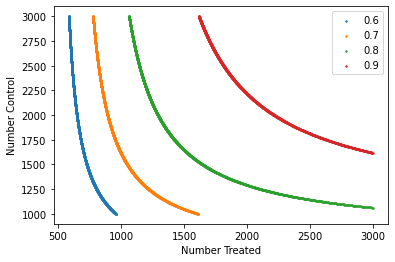

In [54]:
fig,ax = plt.subplots()
for i in range(len(power)):
    x = output[output['power'] == power[i]][['treatment']]
    y = output[output['power'] == power[i]][['control']]
    ax.scatter(x,y, s = 2)
ax.legend(np.round(power,2))
ax.set_xlabel('# Treated')
ax.set_ylabel('# Control')

Problem 1 done in collaboration with Ezana Kremmer and Danielle Abaya.

Problem 2 done in collaboration with Danielle Abaya, Zhirui Wang, and Ezana Kremmer.